<a href="https://colab.research.google.com/github/DanielT118/Gallstones-Research-Project/blob/main/Gallstones_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Which features are most predictive of gallstone disease, and how accurately can we use a machine learning model to make predictions about at risk individuals based on these features?

Importing the libraries neccesary for use later on.

In [62]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

import numpy as np

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest



Saving the data that I had downloaded to the github repository into a dataframe.

In [4]:
url = "https://raw.githubusercontent.com/DanielT118/Gallstones-Research-Project/refs/heads/main/dataset-uci%5B1%5D.csv"
df = pd.read_csv(url)
df.head()


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


From this we can intepret that the data is pretty clean. While outliers are present, the feature naming and datatypes are uniform, and the dataset does not contain any nulls.

In [ ]:
#Checking for duplicate rows
duplicates = df.duplicated()
print(duplicates)
num_duplicates = duplicates.value_counts(False)
print(num_duplicates)
#This indicates that there are no duplicate rows.

0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Length: 319, dtype: bool
False    319
Name: count, dtype: int64


In [ ]:
df.corr()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,1.000000,0.036339,0.153483,-0.048516,-0.096998,-0.055196,0.161901,0.104689,-0.107919,0.048669,...,0.158622,-0.050835,-0.134910,-0.041937,0.109882,-0.132283,-0.028276,0.281995,-0.196872,-0.354873
Age,0.036339,1.000000,0.086144,0.325447,0.129636,0.005289,0.015660,0.279302,-0.307407,0.040579,...,0.103681,0.058043,-0.056930,-0.060163,0.121376,0.106190,-0.555640,-0.002826,-0.121711,0.057599
Gender,0.153483,0.086144,1.000000,-0.032308,-0.095766,0.135212,0.162919,-0.076437,-0.725667,-0.336012,...,0.370333,-0.209787,-0.228504,-0.310551,0.022681,-0.631499,0.024072,0.104154,-0.688754,-0.099308
Comorbidity,-0.048516,0.325447,-0.032308,1.000000,0.381961,0.219226,0.206355,0.525616,-0.073628,0.079539,...,-0.102534,0.172306,-0.045610,-0.021705,-0.073663,0.036678,-0.192767,-0.051218,-0.004605,0.074296
Coronary Artery Disease (CAD),-0.096998,0.129636,-0.095766,0.381961,1.000000,-0.033687,-0.031709,0.018451,0.051080,0.070927,...,-0.071437,0.027974,-0.025911,-0.023239,-0.039137,0.038596,-0.036410,-0.039971,0.013770,-0.028182
Hypothyroidism,-0.055196,0.005289,0.135212,0.219226,-0.033687,1.000000,-0.027328,-0.011817,-0.070563,-0.004688,...,0.008262,0.046188,-0.020628,-0.031078,0.005479,-0.082271,0.001743,0.081460,-0.146965,0.057859
Hyperlipidemia,0.161901,0.015660,0.162919,0.206355,-0.031709,-0.027328,1.000000,-0.004601,-0.106368,-0.031597,...,0.067083,-0.024615,-0.047476,-0.057498,-0.009051,-0.151923,0.054494,-0.018193,-0.182561,0.028342
Diabetes Mellitus (DM),0.104689,0.279302,-0.076437,0.525616,0.018451,-0.011817,-0.004601,1.000000,-0.081155,0.089725,...,-0.107639,0.208226,-0.073480,-0.038840,0.027056,0.016869,-0.137200,-0.024646,0.061703,0.032730
Height,-0.107919,-0.307407,-0.725667,-0.073628,0.051080,-0.070563,-0.106368,-0.081155,1.000000,0.411769,...,-0.312972,0.236025,0.175511,0.248800,-0.067962,0.474618,0.090786,-0.101732,0.601949,0.002873
Weight,0.048669,0.040579,-0.336012,0.079539,0.070927,-0.004688,-0.031597,0.089725,0.411769,1.000000,...,-0.250389,0.311734,0.133568,0.227678,0.084705,0.175980,-0.043529,0.049846,0.304154,-0.085985


In [ ]:
df.var()

,0
Gallstone Status,0.250764
Age,146.762524
Gender,0.250725
Comorbidity,0.267641
Coronary Artery Disease (CAD),0.036316
Hypothyroidism,0.027503
Hyperlipidemia,0.024526
Diabetes Mellitus (DM),0.116993
Height,101.063406
Weight,246.774864


From analyzing the correlation and variance, it is clear that many features such as BMI or Obseity, which I had intitally hypothesized to be key features were not as strongly correlated to gallstone status as I had thought. This step also allows me to get a better sense of the data without reading through all of it.

In [22]:
features = df.drop('Gallstone Status', axis = 1)
label = df['Gallstone Status']

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(k = 5)
selector.fit_transform(features, label)

best_features = df[selector.get_feature_names_out()]
best_features

,Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Bone Mass (BM),C-Reactive Protein (CRP),Vitamin D
0,19.20,80.84,3.7,0.0,33.0
1,32.80,67.20,3.2,0.0,25.0
2,27.30,72.67,3.3,0.0,30.2
3,15.80,84.19,2.9,0.0,35.4
4,20.00,80.02,3.5,0.0,40.6
...,...,...,...,...,...
314,24.66,75.23,3.3,6.2,8.3
315,23.60,76.40,2.1,0.0,24.0
316,28.80,71.22,3.4,0.0,15.7
317,21.10,78.85,3.4,0.4,33.3


Here, I am outputting a graph with the f_classifier scores for the three highlighted columns, helping us visually understand the relative strength of the correlation they have with the target variable.

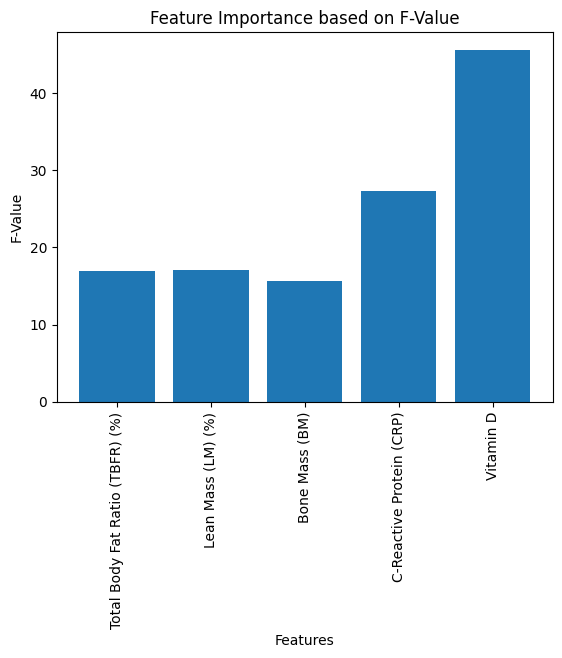

In [49]:
fit = selector.fit(best_features, label)
scores = fit.scores_
feature_names = best_features.columns
plt.bar(feature_names , scores)
plt.xlabel("Features")
plt.ylabel("F-Value")
plt.title("Feature Importance based on F-Value")
plt.xticks(rotation= 90)
plt.show()

Select K best allowed me to pick out the best features for training a machine learning algorithim to predict gallstone disease, which is crucial in making the most accurate predictions possible. Evidently, CRP and Vitamin D are the best indicators of gallstone disease, but intrestingly, the model proved most accurate when Bone Mass was used as a feature, despite it only being fifth, so I decided it to explore it along with the two runaway leaders.

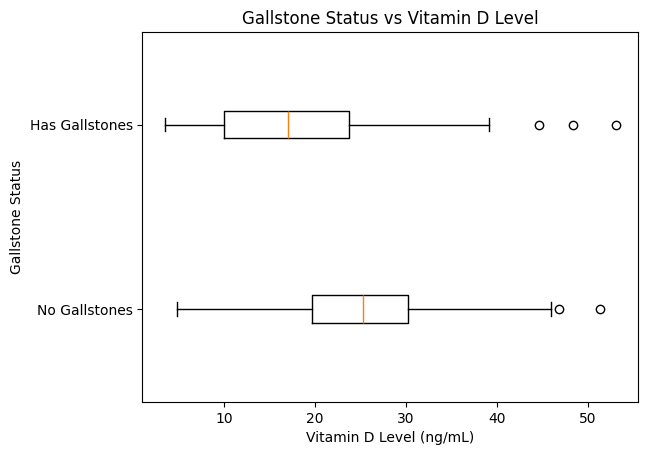

In [78]:
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
vitamin_d_graph = no_gallstones['Vitamin D'], gallstones_present['Vitamin D']
plt.boxplot(vitamin_d_graph, vert = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('Vitamin D Level (ng/mL)')
plt.ylabel('Gallstone Status')
plt.title('Gallstone Status vs Vitamin D Level')
plt.show()

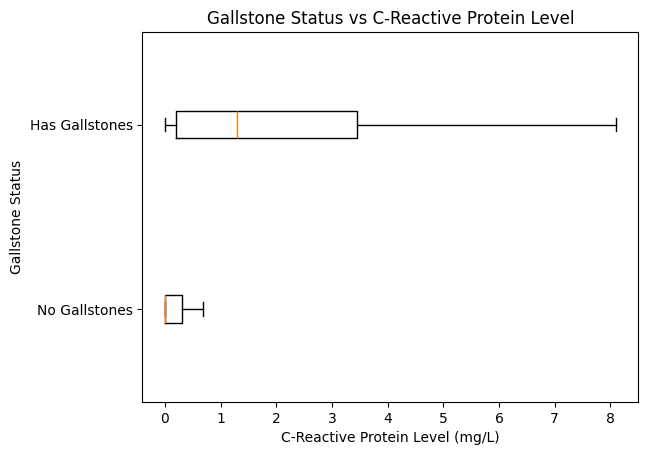

In [79]:
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
crp_graph = no_gallstones['C-Reactive Protein (CRP)'], gallstones_present['C-Reactive Protein (CRP)']
plt.boxplot(crp_graph, vert = False, showfliers = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('C-Reactive Protein Level (mg/L)')
plt.ylabel('Gallstone Status')
plt.title('Gallstone Status vs C-Reactive Protein Level')
plt.show()

I chose to remove outliers for this boxplot, as both groups (gallstones and no gallstones) had some very high outliers that threw off the aestheics and simplcity of the plot.

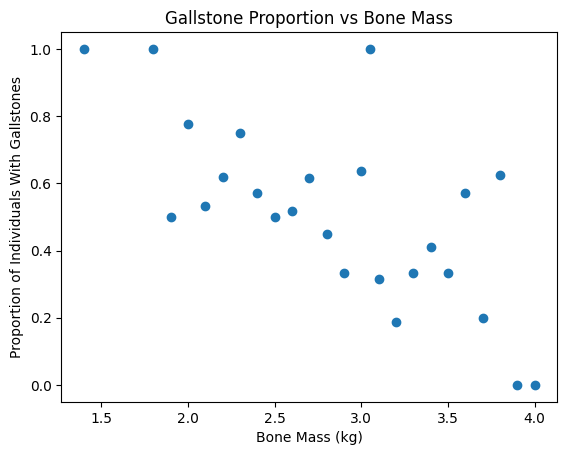

In [77]:
grouped_data = df.groupby('Bone Mass (BM)')
gallstone_frac = grouped_data['Gallstone Status'].mean()

x_values = gallstone_frac.index
plt.scatter(x_values, gallstone_frac)

plt.xlabel('Bone Mass (kg)')
plt.ylabel('Proportion of Individuals With Gallstones')
plt.title('Gallstone Proportion vs Bone Mass')

plt.show()

Here I am just creating basic plots for the best features I had identified in otder to visually observe how they are correlated to gallstone status. Low Vitamin D levels and bone mass seem to be indicative of gallstones, while the same can be said about high C-Reactive Protein levels.

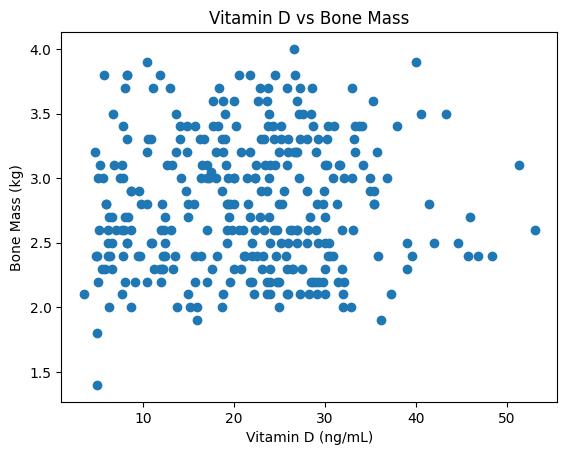

In [ ]:
plt.scatter(df['Vitamin D'], df['Bone Mass (BM)'])

plt.xlabel('Vitamin D (ng/mL)')
plt.ylabel('Bone Mass (kg)')
plt.title('Vitamin D vs Bone Mass')

plt.show()

Given the main purpose of Vitamin D is to maintain bone health, I was concerned that the features Vitamin D and Bone Mass would be very strongly correlated, and as such, it would not be necessary to include both in the machine learning model. However, the graph proves that both can be included as distinct and helpful features in the model.

Accuracy: 0.796875
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.88      0.68      0.76        31

    accuracy                           0.80        64
   macro avg       0.81      0.79      0.79        64
weighted avg       0.81      0.80      0.79        64



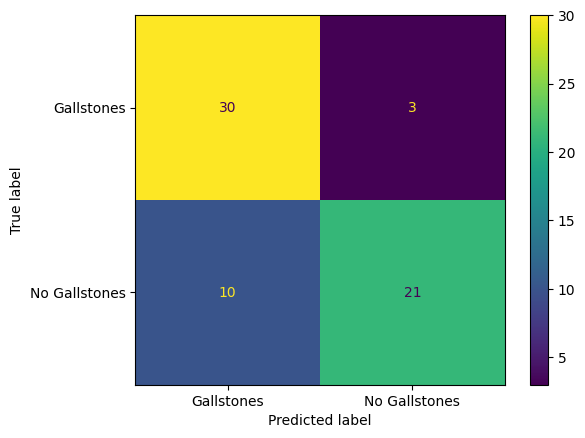

In [73]:
features = df[['C-Reactive Protein (CRP)', 'Vitamin D', 'Bone Mass (BM)']]
labels = df['Gallstone Status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state = 42)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ['Gallstones', 'No Gallstones'])

plt.show()


Here I have implemented my K nearest neighbors machine learning model, which can make predictions with relatively high accuracy, as shown by the confusion matrix, accuracy and classification report. Unfotunately, given that three features were used for training the model, the decision boundary could not be represented in a two dimensional plot, so we must understand it in a more conceptual sense.

Using a nearest neighbors value of two ended up appearing the most accurate, even if that was not reflected in the K-folds cross validation. Furthermore, the unscaled model tended to perform better than the scaled model.

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.73      0.71      0.72        31

    accuracy                           0.73        64
   macro avg       0.73      0.73      0.73        64
weighted avg       0.73      0.73      0.73        64



In [76]:
scores = cross_val_score(model, X_train, y_train, cv=2)
print("2-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

2-Folds CV Scores: 0.6942667322834646 +/- 0.03801673228346458


In [34]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("5-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

5-Folds CV Scores: 0.6705882352941177 +/- 0.028817526385684453


In [35]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))


10-Folds CV Scores: 0.6781538461538461 +/- 0.10290870314716805


In [75]:
scores = cross_val_score(model, X_train, y_train, cv=18)
print("18-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

18-Folds CV Scores: 0.7013227513227513 +/- 0.10027432209365361


In [74]:
scores = cross_val_score(model, X_train, y_train, cv= 20 )
print("20-Folds CV Scores: " + str(scores.mean()) + " +/- " + str(scores.std()))

20-Folds CV Scores: 0.703525641025641 +/- 0.10558209941695257


0.53125


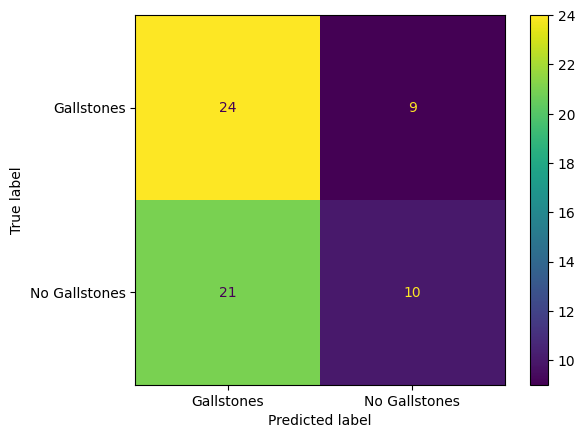

In [38]:
features = df.drop(columns = 'Gallstone Status')
labels = df['Gallstone Status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state = 42)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ['Gallstones', 'No Gallstones'])

plt.show()

Evidently, running KNN with all features led to a less accurate result, as demonstrated by the significantly worse results when the model was trained on all features in the dataset.


Ultimately, the factors which most significantly contribute to prediciting gallstone disease are Vitamin D, C-Reactive Protein and Bone Mass. When used to train a K-Nearest Neighbors machine learnming model, gallstone disease can be predicted with around eighty percent accuracy.